# **Part 1: Introduction to SQLite and Comparisons with Other RDBMS**

## **1.1 What is SQLite?**

SQLite is a relational database management system (RDBMS) that is embedded into the application that uses it. Unlike other databases, SQLite is serverless, meaning it doesn’t require a separate server process or a service. Instead, the database engine runs as part of the application itself. It is highly portable, making it ideal for applications where simplicity and portability are important.

Some features of SQLite include:
- **Lightweight and Compact**: The entire database is stored in a single cross-platform disk file.
- **Zero Configuration**: It doesn’t need any configuration or setup to get started.
- **Cross-Platform**: SQLite databases can be shared between systems with different architectures (e.g., Windows, Linux, macOS).

## **1.2 Differences Between SQLite and Other RDBMS (MySQL, SQL Server)**

Here is a comparison of SQLite with other popular RDBMS like MySQL and SQL Server:

| Feature              | **SQLite**                               | **MySQL**                              | **SQL Server**                        |
|----------------------|------------------------------------------|----------------------------------------|---------------------------------------|
| **Architecture**      | Serverless, embedded within application  | Client-server model                    | Client-server model                   |
| **Concurrency**       | Limited concurrency (single writer)      | Supports many simultaneous connections | Supports many simultaneous connections|
| **Scalability**       | Not suited for large-scale applications  | Scalable for large apps                | Highly scalable                       |
| **Setup**             | No setup required, built into the app    | Requires server installation           | Requires server installation          |
| **Transactions**      | ACID compliant, but lacks fine-grained locking | Fully ACID compliant                   | Fully ACID compliant                  |
| **Data Types**        | Dynamic typing                          | Static typing (specific data types)    | Static typing (specific data types)   |
| **Storage**           | Single file database                    | Data stored across multiple files      | Data stored across multiple files     |
| **Ideal Use Cases**   | Embedded systems, small apps, testing    | Web applications, moderate to large-scale applications | Enterprise-level, large applications  |

### **Explanation of the Key Differences**:

- **Architecture**: Unlike MySQL and SQL Server, which follow a client-server architecture where the database runs on a server and applications connect to it over a network, SQLite is serverless. The entire database is a single file, and it is embedded directly into the application.
  
- **Concurrency**: SQLite allows many simultaneous read operations but only one write operation at a time. In contrast, MySQL and SQL Server can handle many concurrent readers and writers, making them better suited for larger, high-traffic applications.
  
- **Scalability**: While SQLite can handle small to medium-sized applications, it is not ideal for large applications that require heavy concurrency, high availability, or enterprise-level features like replication and load balancing. MySQL and SQL Server, however, are designed to handle such workloads.

- **Setup**: SQLite is extremely easy to set up because it doesn’t require any external server. It’s built into the application, so there's no need to install or configure anything. MySQL and SQL Server require server installations and configurations.

- **Transactions and Data Integrity**: SQLite is ACID (Atomicity, Consistency, Isolation, Durability) compliant, ensuring data integrity during transactions, but lacks the fine-grained locking mechanisms that MySQL and SQL Server provide for handling highly concurrent writes.

- **Data Types**: SQLite uses dynamic typing, which means that data types are not strictly enforced. For example, you could insert a string into an integer field. MySQL and SQL Server use static typing, ensuring that data stored in a column strictly adheres to the defined data type.

## **1.3 Limitations of SQLite**

While SQLite is powerful and easy to use, it has some key limitations when compared to other RDBMS:

1. **Concurrency**: SQLite allows multiple readers but only one writer at a time. This limits its ability to scale to high-concurrency environments, such as web applications with many simultaneous writes.
  
2. **Size Limitations**: While SQLite databases can grow to be quite large (up to 281 terabytes), performance begins to degrade as the database grows beyond 1TB, making it unsuitable for very large datasets.
  
3. **No User Management**: Unlike MySQL or SQL Server, which allow you to define users and grant permissions, SQLite does not support user authentication or role-based access control. This makes it less secure in environments with multiple users.
  
4. **No Stored Procedures or Triggers**: SQLite does not have built-in support for stored procedures or triggers, features commonly used in enterprise databases for complex logic and automation.

5. **Limited Data Integrity**: Because of dynamic typing, SQLite does not strictly enforce data types, which can lead to data integrity issues in certain use cases.

## **1.4 What is SQLite Really Good For?**

Despite its limitations, SQLite has several advantages that make it the right choice for many use cases:

- **Mobile Applications**: SQLite is used extensively in mobile applications because it is small, fast, and can easily store local data. Both Android and iOS use SQLite as their default database engine.
  
- **Embedded Systems**: Devices like TVs, cars, cameras, and other electronics often use SQLite as a lightweight database system for configuration settings and local storage.
  
- **Testing and Development**: Developers frequently use SQLite as a testing or development database because it’s easy to set up and requires no external dependencies. It allows you to quickly create and manipulate databases without the overhead of a full RDBMS.
  
- **Browser Data Storage**: Browsers like Mozilla Firefox use SQLite to store local data (e.g., user preferences, history, and cookies). It’s also popular in desktop apps that require simple, local data storage without the complexity of managing a separate server.
  
- **Data Analysis**: SQLite can be used for small-scale data analysis, as it can store structured data in a simple, self-contained database file that can be queried without any complex setup.

---

Now that we have a better understanding of SQLite, let’s move on to  But Wait...what is ACID? We didn't talk much about that....creating and interacting with a real-world database example in Part 2!


# **ACID Properties in Databases**

ACID is an acronym used to describe the four essential properties that ensure the reliability and integrity of a database system during a transaction. These properties are **Atomicity**, **Consistency**, **Isolation**, and **Durability**.

## **1. Atomicity**

Atomicity ensures that each transaction is treated as a single, indivisible unit of work. This means that either **all** operations within the transaction are executed successfully, or **none** of them are executed. In case of any error or failure during a transaction, the database must rollback to its previous state, ensuring that partial transactions don’t corrupt the database.

- **Example**: If you're transferring money between two accounts, either both the debit and credit operations succeed, or neither happens. If only one operation occurs and the system crashes, the data would become inconsistent.

## **2. Consistency**

Consistency ensures that a transaction brings the database from one valid state to another, maintaining the predefined rules, constraints, and integrity of the data. After a transaction, the database must remain in a valid state, and any constraints such as primary keys, foreign keys, or unique constraints must still be satisfied.

- **Example**: If a bank account's balance cannot go negative, a transaction that attempts to overdraw the account must be rejected. Even if multiple transactions are running, the rules of the system must be followed, ensuring that only valid data persists in the database.

## **3. Isolation**

Isolation guarantees that concurrent transactions occur independently without interfering with each other. Even if transactions are executed simultaneously, the final outcome should be as if they were executed sequentially. This prevents issues like "dirty reads" or "lost updates," where one transaction could read or modify data being used by another transaction.

There are multiple levels of isolation, ranging from:
- **Read Uncommitted**: Lowest isolation level, allowing dirty reads.
- **Serializable**: Highest isolation level, ensuring full isolation but may reduce concurrency.

- **Example**: If two users are booking the last seat on a flight at the same time, isolation ensures that only one booking will succeed, preventing double booking.

## **4. Durability**

Durability guarantees that once a transaction is committed, the changes made by the transaction are permanent, even in the event of a system crash or power failure. The database must ensure that the data is saved to persistent storage (e.g., disk) and can be recovered after a system reboot or crash.

- **Example**: If you submit an order on an e-commerce site and the transaction is committed, even if the system crashes immediately after, the order will still be saved and processed once the system is back online.

---

## **Conclusion**

ACID properties are fundamental to ensuring data integrity, reliability, and robustness in a database system. They are especially important for databases that handle financial transactions, user data, and other mission-critical applications. By following the ACID properties, databases ensure that data remains accurate, consistent, and durable in the face of system failures, concurrent transactions, and unforeseen errors.


# **Part 2: Setting Up SQLite for the Ice Cream Database**

In this section, we'll cover how to set up an SQLite database for the ice cream shop, including creating connections, understanding cursors, and handling database files in both Jupyter notebooks and regular Python scripts.

---

## **Step 1: Creating a Connection to SQLite**

In SQLite, the first thing you need to do is establish a **connection** to the database. The connection serves as the link between your Python code and the SQLite databas and connected!")


In [ ]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('ice_cream_shop.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!



The sqlite3.connect() function creates a connection object representing the database.
If the file ice_cream_shop.db already exists, SQLite will connect to it. If it doesn’t exist, SQLite will create a new file with that name in the working directory.

## **Step 2: Understanding the Cursor**

Once you've created a connection to the SQLite database, the next thing you'll need is a **cursor** object. The cursor allows you to execute SQL commands and interact with the database.



In [ ]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


**Explanation**:
The cursor is like a controller that interacts with the database. It allows you to:
Execute SQL queries (e.g., creating tables, inserting data, retrieving records).
Fetch results from queries.
Without a cursor, your Python code wouldn’t be able to send SQL commands to the database.
After you’ve created the cursor, you can start executing SQL commands.

**Why Do We Need a Cursor?**
In SQLite (and other relational databases), the cursor acts as the intermediary between your Python code and the database. It runs SQL queries and fetches results. Think of it as a "pointer" that moves through the database.

The cursor enables these important functions:

- Executing SQL Statements: It allows you to execute SQL statements such as SELECT, INSERT, UPDATE, and DELETE.
Fetching Results:
- It retrieves the results from a SELECT query, allowing you to process the returned data in your Python code.
You must create a cursor for each connection to the database

**Example: Executing an SQL Query**
Let’s use the cursor to create a table for our ice cream sales data:

In [ ]:
# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    flavor TEXT NOT NULL,
    sales INTEGER,
    revenue INTEGER
)
''')

print("Sales table created!")


Sales table created!


**Explanation:**

The SQL statement CREATE TABLE IF NOT EXISTS ensures that the table is only created if it doesn't already exist.
The table sales includes four columns:
- id: A unique identifier for each record, automatically incremented.
- flavor: The flavor of the ice cream (a TEXT field).
- sales: The number of ice creams sold.
- revenue: The total revenue generated from each flavor.

The cursor executes this command to create the sales table in the database.

**What Happens If the Table Already Exists?**

The **CREATE TABLE IF NOT EXISTS** statement ensures that the table will not be recreated if it already exists in the database. This is useful when you need to rerun your script or notebook without causing errors due to an existing table.

**Closing the Cursor**

Once you’re done executing SQL commands, it’s a good practice to close the cursor.

In [ ]:
# Close the cursor
cursor.close()

# Explanation
print("Cursor closed!")


Cursor closed!




## **Step 3: Creating Tables for the Ice Cream Shop**

Now that we have a connection and cursor, let’s create the necessary tables for storing ice cream sales data. This table will hold details like the flavor, number of sales, and revenue generated.




In [ ]:
# Create the sales table
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    flavor TEXT NOT NULL,
    sales INTEGER,
    revenue INTEGER
)
''')

print("Sales table created!")

Cursor created!
Sales table created!




Let’s create a new table called `flavor_details`, which will store additional information about each ice cream flavor.


In [ ]:


# Create the flavor_details table
cursor.execute('''
CREATE TABLE IF NOT EXISTS flavor_details (
    flavor_id INTEGER PRIMARY KEY AUTOINCREMENT,
    flavor TEXT NOT NULL,
    category TEXT,
    supplier TEXT
)
''')

print("Flavor details table created!")


Flavor details table created!


Now let's do an insert

In [ ]:
# Sample data to insert into the sales table
sales_data = [
    ('Vanilla', 100, 200),
    ('Chocolate', 150, 300),
    ('Strawberry', 80, 160),
    ('Mint', 70, 140),
    ('Cookie Dough', 120, 240)
]

# Insert data into the table
cursor.executemany('''
INSERT INTO sales (flavor, sales, revenue) VALUES (?, ?, ?)
''', sales_data)

# Commit the transaction
connection.commit()

print("Data inserted into the sales table!")


Data inserted into the sales table!


In [ ]:
# Sample data for the flavor_details table
flavor_details_data = [
    ('Vanilla', 'Classic', 'Supplier A'),
    ('Chocolate', 'Classic', 'Supplier B'),
    ('Strawberry', 'Premium', 'Supplier C'),
    ('Mint', 'Classic', 'Supplier A'),
    ('Cookie Dough', 'Premium', 'Supplier B')
]

# Insert data into the flavor_details table
cursor.executemany('''
INSERT INTO flavor_details (flavor, category, supplier) VALUES (?, ?, ?)
''', flavor_details_data)

# Commit the transaction
connection.commit()

print("Data inserted into the flavor details table!")


Data inserted into the flavor details table!


**Querying Data in SQLITE**

## **Step 5: Querying the Data**

Once the data is inserted into the `sales` table, we can execute various SQL queries to retrieve and analyze the information. Let’s go through a few examples of queries that provide useful insights.

---

### **1. Fetch All Data from the Sales Table**




In [ ]:

# Fetch all data from the sales table
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# Print the results
print("All sales data:")
for row in rows:
    print(row)

All sales data:


In [ ]:
# Query for the flavor with the highest sales
cursor.execute('''
SELECT flavor, MAX(sales) FROM sales
''')
highest_sales = cursor.fetchone()

# Display the result
print(f"Flavor with the highest sales: {highest_sales[0]}")


Flavor with the highest sales: Chocolate


- cursor.fetchall() fetches all the rows returned by the query, and we use a loop to print each row.

- The MAX() function in SQL returns the maximum value in a column, which in this case is the highest number of sales.
- We use cursor.fetchone() to retrieve the first (and only) result of this query, which gives us the flavor with the most sales.
- This query identifies which ice cream flavor has the best performance in terms of sales.


In [ ]:
# Query for the total revenue
cursor.execute('''
SELECT SUM(revenue) FROM sales
''')
total_revenue = cursor.fetchone()[0]

# Display the result
print(f"Total revenue: ${total_revenue}")


Total revenue: $1040


- The SUM() function adds up all the values in the revenue column, calculating the total revenue generated by all flavors combined.
- We use cursor.fetchone()[0] to get the total revenue since the query returns just one row with one column.
- This query provides insight into how much money the ice cream shop has made from all its sales.

In [ ]:
# Query for the average revenue per flavor
cursor.execute('''
SELECT AVG(revenue) FROM sales
''')
average_revenue = cursor.fetchone()[0]

# Display the result
print(f"Average revenue per flavor: ${average_revenue}")


Average revenue per flavor: $208.0


In [ ]:
# Query to sort flavors by sales in descending order
cursor.execute('''
SELECT flavor, sales FROM sales ORDER BY sales DESC
''')
sorted_sales = cursor.fetchall()

# Display the results
print("Flavors sorted by sales:")
for sale in sorted_sales:
    print(f"{sale[0]}: {sale[1]} sales")


Flavors sorted by sales:
Chocolate: 150 sales
Cookie Dough: 120 sales
Vanilla: 100 sales
Strawberry: 80 sales
Mint: 70 sales



---

### **Summary of Step 5**:

This step demonstrates how to:
1. **Retrieve all data** from the `sales` table.
2. **Find the flavor with the highest sales** using the `MAX()` function.
3. **Calculate total revenue** using the `SUM()` function.
4. **Find average revenue per flavor** using the `AVG()` function.
5. **Sort flavors by sales** in descending order using `ORy anything!


# **Step 6: Performing JOIN Queries**

In this section, we’ll perform SQL **JOIN** queries to combine data from the `sales` table and the `flavor_details` table. JOINs allow us to retrieve related data from multiple tables in a single query.

---

### **1. Join Sales and Flavor Details to Get Full Information**

Let’s perform an **INNER JOIN** to combine the sales data with additional flavor details like category and supplier.




In [ ]:

# Perform a JOIN query between sales and flavor_details
cursor.execute('''
SELECT sales.flavor, sales.sales, sales.revenue, flavor_details.category, flavor_details.supplier
FROM sales
JOIN flavor_details ON sales.flavor = flavor_details.flavor
''')

# Fetch and display the results
joined_data = cursor.fetchall()

print("Joined sales and flavor details:")
for row in joined_data:
    print(row)


Joined sales and flavor details:
('Vanilla', 100, 200, 'Classic', 'Supplier A')
('Chocolate', 150, 300, 'Classic', 'Supplier B')
('Strawberry', 80, 160, 'Premium', 'Supplier C')
('Mint', 70, 140, 'Classic', 'Supplier A')
('Cookie Dough', 120, 240, 'Premium', 'Supplier B')


In [ ]:
import pandas as pd

# Query the sales data into a DataFrame
df = pd.read_sql_query('SELECT * FROM sales', connection)

# Display the DataFrame
df.head()


,id,flavor,sales,revenue
0,1,Vanilla,100,200
1,2,Chocolate,150,300
2,3,Strawberry,80,160
3,4,Mint,70,140
4,5,Cookie Dough,120,240


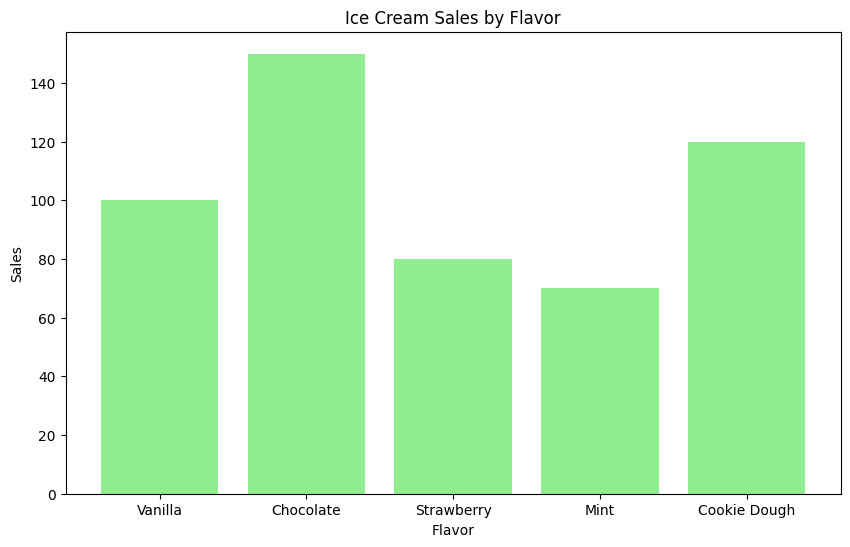

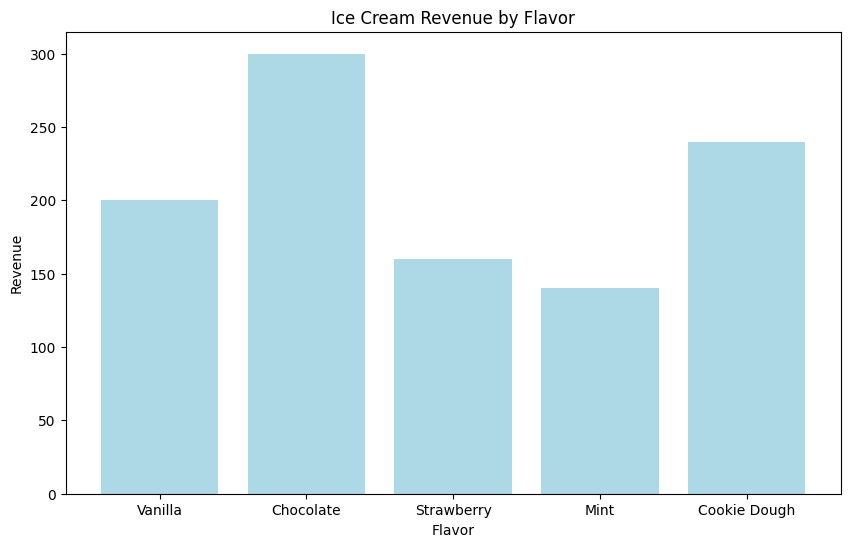

In [ ]:
import matplotlib.pyplot as plt

# Plot sales data
plt.figure(figsize=(10,6))
plt.bar(df['flavor'], df['sales'], color='lightgreen')
plt.xlabel('Flavor')
plt.ylabel('Sales')
plt.title('Ice Cream Sales by Flavor')
plt.show()

# Plot revenue data
plt.figure(figsize=(10,6))
plt.bar(df['flavor'], df['revenue'], color='lightblue')
plt.xlabel('Flavor')
plt.ylabel('Revenue')
plt.title('Ice Cream Revenue by Flavor')
plt.show()


# **Step 7: Emptying the Database and Loading Data from a CSV File**

---

## **1. Emptying the Existing Tables**

In [ ]:
# Delete all data from the sales and flavor_details tables
cursor.execute("DELETE FROM sales")
cursor.execute("DELETE FROM flavor_details")
connection.commit()

print("All data from sales and flavor_details tables has been deleted.")

All data from sales and flavor_details tables has been deleted.


**Loading Data from a CSV File into a Pandas DataFrame**

Let’s assume we have a CSV file containing ice cream sales data. We'll load the data into a Pandas DataFrame and then insert it into the SQLite database.

In [ ]:
import pandas as pd

# Load data from CSV into a DataFrame
df_sales = pd.read_csv('ice_cream_sales.csv')

# Display the first few rows of the DataFrame
print(df_sales.head())


FileNotFoundError: [Errno 2] No such file or directory: 'ice_cream_sales.csv'

**Inserting Data from the DataFrame into the Database**
Now that we have the data in a DataFrame, we can insert it into the SQLite database. We’ll use the to_sql() function from Pandas to insert the data directly.



In [1]:
# Insert data from the DataFrame into the sales table
df_sales.to_sql('sales', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the sales table.")


NameError: name 'df_sales' is not defined

In [ ]:

# Fetch all data from the sales table
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# Print the results
print("All sales data:")
for row in rows:
    print(row)

In [ ]:
# Load flavor details from another CSV file into a DataFrame
df_flavor_details = pd.read_csv('flavor_details.csv')

# Insert data from the DataFrame into the flavor_details table
df_flavor_details.to_sql('flavor_details', connection, if_exists='replace', index=False)

print("Data from CSV has been inserted into the flavor_details table.")


In [ ]:
# Query the sales table to confirm data insertion
cursor.execute("SELECT * FROM sales")
rows = cursor.fetchall()

# Display the data
print("Sales data:")
for row in rows:
    print(row)




```
# This is formatted as code
```

**SQLITE HW**


In [1]:
import sqlite3

# Connect to the SQLite database
connectionhw = sqlite3.connect('student_grades.db')

# Create a cursor object
cursorhw = connectionhw.cursor()

In [2]:
# Creating student table
cursorhw.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

# Creating grades table
cursorhw.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

# Commit the changes
connectionhw.commit()

In [4]:
# Inputting students data
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursorhw.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connectionhw.commit()

In [7]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 90),
    (3, 'English', 91),
    (3, 'History', 88),
    (4, 'Math', 78),
    (4, 'English', 85),
    (4, 'History', 82),
    (5, 'Math', 88),
    (5, 'English', 79),
    (5, 'History', 84)
]

cursorhw.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connectionhw.commit()

In [6]:
cursorhw.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_datahw = cursorhw.fetchall()

print("Joined students and grades details:")
for row in joined_datahw:
    print(row)

Joined students and grades details:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 90)
('Carol', 'White', 'English', 91)
('Carol', 'White', 'History', 88)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 85)
('David', 'Brown', 'History', 82)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 79)
('Eve', 'Davis', 'History', 84)


In [8]:
cursorhw.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
avggrades = cursorhw.fetchall()

for row in avggrades:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 89.66666666666667)
('David', 'Brown', 81.66666666666667)
('Eve', 'Davis', 83.66666666666667)


In [9]:
cursorhw.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) as average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY average_grade DESC
LIMIT 1
''')
highestavggrade = cursorhw.fetchone()[0]

print(f"The student with the highest average grade is: {highestavggrade}")

The student with the highest average grade is: Alice


In [10]:
cursorhw.execute('''
SELECT AVG(grade) as average_math_grade
FROM grades
WHERE subject = 'Math'
''')
mathavggrade = cursorhw.fetchone()[0]

print(f"The average grade for the math subject is: {mathavggrade}")

The average grade for the math subject is: 86.6


In [11]:
cursorhw.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')
gradesabove90 = cursorhw.fetchall()

for row in gradesabove90:
    print(row)

('Alice', 'Johnson')
('Carol', 'White')


In [13]:
import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connectionhw)
grades_df = pd.read_sql_query('SELECT * FROM grades', connectionhw)
print(students_df)
print(grades_df)

   student_id first_name last_name
0           1      Alice   Johnson
1           2        Bob     Smith
2           3      Carol     White
3           4      David     Brown
4           5        Eve     Davis
5           6      Alice   Johnson
6           7        Bob     Smith
7           8      Carol     White
8           9      David     Brown
9          10        Eve     Davis
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82
4          5           2  English     76
5          6           2  History     85
6          7           3     Math     90
7          8           3  English     91
8          9           3  History     88
9         10           4     Math     78
10        11           4  English     85
11        12           4  History     82
12        13           5     Math     88
13        14           5  English     79


In [14]:
joined = '''
SELECT
    students.first_name, students.last_name, grades.subject, grades.grade
FROM
    students
JOIN
    grades
ON
    grades.student_id = grades.student_id
'''
joined_df = pd.read_sql_query(joined, connectionhw)

print(joined_df)

    first_name last_name  subject  grade
0        Alice   Johnson     Math     95
1          Bob     Smith     Math     95
2        Carol     White     Math     95
3        David     Brown     Math     95
4          Eve     Davis     Math     95
..         ...       ...      ...    ...
295      Alice   Johnson  History     84
296        Bob     Smith  History     84
297      Carol     White  History     84
298      David     Brown  History     84
299        Eve     Davis  History     84

[300 rows x 4 columns]


In [15]:
cursorhw.execute("DELETE FROM students")
cursorhw.execute("DELETE FROM grades")
connectionhw.commit()

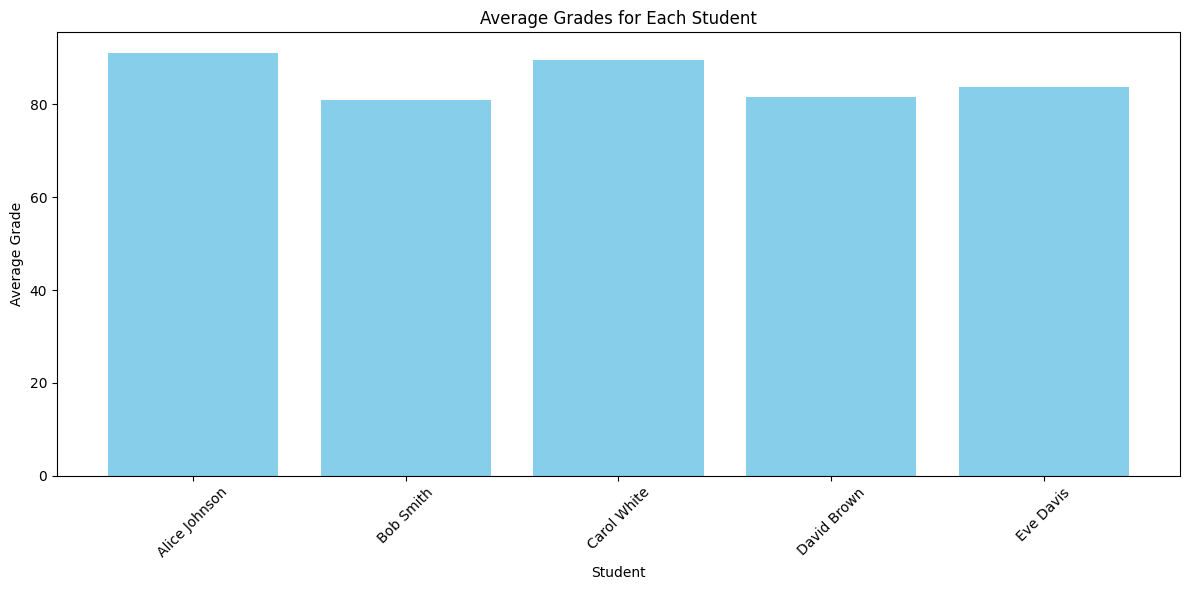

In [21]:
import matplotlib.pyplot as plt

# Calculate average grades for each student
avg_grades_df = merged_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
avg_grades_df.columns = ['First Name', 'Last Name', 'Average Grade']

# Plot average grades for each student
plt.figure(figsize=(12, 6))
plt.bar(avg_grades_df['First Name'] + ' ' + avg_grades_df['Last Name'], avg_grades_df['Average Grade'], color='skyblue')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

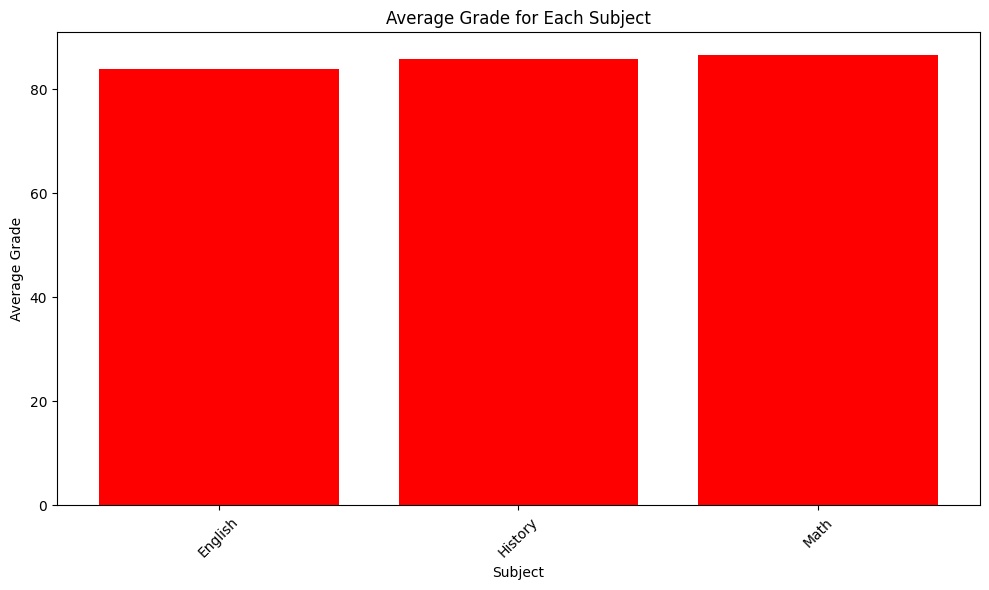

In [23]:
import matplotlib.pyplot as plt

# Calculate average grades for each subject
avg_subject_grades_df = merged_df.groupby('subject')['grade'].mean().reset_index()
avg_subject_grades_df.columns = ['Subject', 'Average Grade']

# Plot average grade for each subject
plt.figure(figsize=(10, 6))
plt.bar(avg_subject_grades_df['Subject'], avg_subject_grades_df['Average Grade'], color='red')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

   subject first_name last_name  grade
0     Math      Alice   Johnson     95
1  History      Alice   Johnson     90
2  English      Carol     White     91


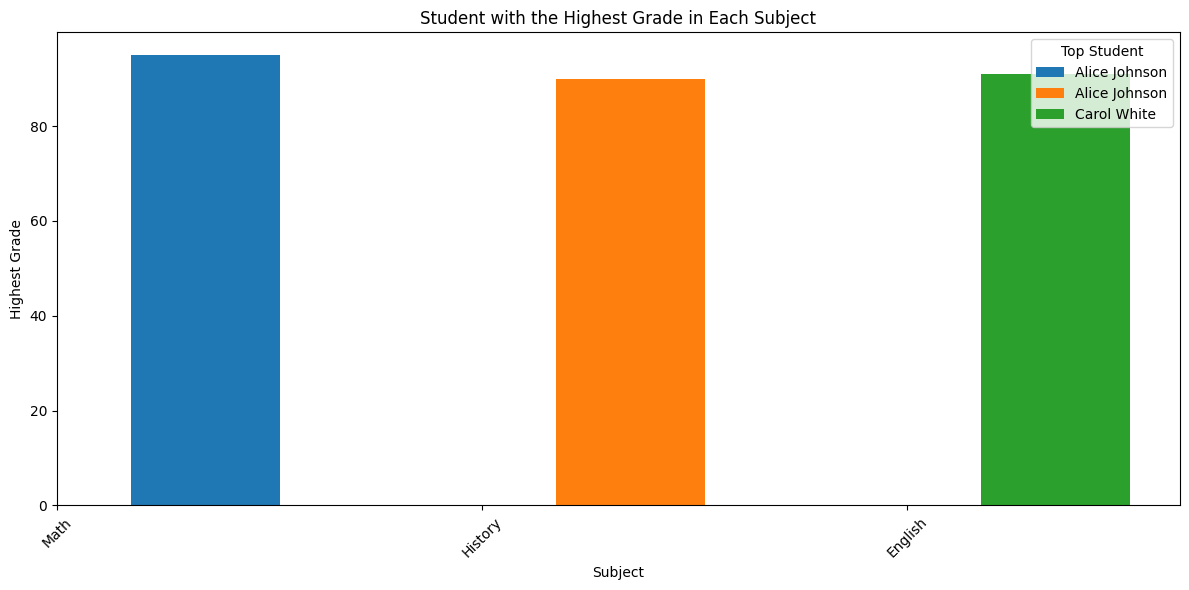

In [24]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
connectionhw = sqlite3.connect('student_grades.db')

# Execute the query and load the result into a DataFrame
query = '''
WITH MaxGrades AS (
    SELECT subject, MAX(grade) AS max_grade
    FROM grades
    GROUP BY subject
)
SELECT g.subject, s.first_name, s.last_name, g.grade
FROM MaxGrades mg
JOIN grades g ON mg.subject = g.subject AND mg.max_grade = g.grade
JOIN students s ON g.student_id = s.student_id
'''

highest_grades_df = pd.read_sql_query(query, connectionhw)
print(highest_grades_df)
import matplotlib.pyplot as plt

# Create a grouped bar chart
plt.figure(figsize=(12, 6))

# Get unique subjects
subjects = highest_grades_df['subject'].unique()

# Number of subjects
n_subjects = len(subjects)

# Set positions for the bars
bar_width = 0.35
index = range(n_subjects)

# Plot bars
for i, subject in enumerate(subjects):
    subset = highest_grades_df[highest_grades_df['subject'] == subject]
    plt.bar(index[i] + bar_width, subset['grade'].values[0], bar_width, label=f"{subset['first_name'].values[0]} {subset['last_name'].values[0]}")

# Customize plot
plt.xlabel('Subject')
plt.ylabel('Highest Grade')
plt.title('Student with the Highest Grade in Each Subject')
plt.xticks(index, subjects, rotation=45)
plt.legend(title='Top Student')
plt.tight_layout()

# Show plot
plt.show()